In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hateevalgold/en_a.tsv
/kaggle/input/tweets-with-sarcasm-and-irony/train.csv
/kaggle/input/tweets-with-sarcasm-and-irony/test.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv
/kaggle/input/project/test.tsv
/kaggle/input/project/dev.tsv
/kaggle/input/project/dev_en.tsv
/kaggle/input/project/train.tsv
/kaggle/input/project/sarcasm-dataset.txt
/kaggle/input/project/test_en.tsv
/kaggle/input/project/train_en.tsv
/kaggle/input/project1/en_a.tsv
/kaggle/input/project1/test.tsv
/kaggle/input/project1/hateEval_train.csv
/kaggle/input/project1/dev.tsv
/kaggle/input/project1/dev_en.tsv
/kaggle/input/project1/emoevent_es.csv
/kaggle/input/project1/train.tsv
/kaggle/input/project1/emoevent_test.tsv
/kaggle/input/project1/intertass_train.csv
/kaggle/input/project1/emoevent_dev.tsv
/kaggle/input/project1/intertass_test.csv
/kaggle/input/project1/trial_en.tsv
/kaggle/input/project1/emoevent_tra

In [2]:
!pip install pandas
!pip install emoji

In [3]:
import pandas as pd

In [4]:
#PRE PROCESSING

import re
import emoji
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def pre_process(text):

    text = text.replace('\n', '')
    text = text.replace('\t', '')
    text = text.replace('\s', '')
    text = re.sub(r'https?://\S+|www\.\S+', 'url', text) # to remove url
    text = re.sub(r'\S+@\S+', 'email', text) # to remove email
    text = re.sub(r'@\S+', 'user', text) # to remove user
    text = re.sub(r'\d+%', 'percentage', text) # to remove percentange
    text = re.sub(r'\$\d+(\.\d+)?', 'money', text) # to remove money
    text = re.sub(r'\d+/\d+/\d+', 'date', text) # to remove dates
    text = re.sub(r'\d+:\d+', 'time', text) # to put time in the place of time
    text = re.sub(r'\d{3}-\d{3}-\d{4}', 'phone', text) # phone number
    text = re.sub(r'#(\S+)', lambda x: ' '.join(re.findall(r'[A-Z]?[a-z]+', x.group())), text)# to remove hashtags
    text = re.sub(r'\b(\w+?)\1{2,}\b', r'\1', text) # to remove elongated words
    text = emoji.demojize(text) # to remove emojies
    text = text.lower() # to convert into lower case

    stop_words = set(stopwords.words('english'))
    words = text.split(" ")
    final_words = [word for word in words if word not in stop_words]
    final_sen = ' '.join(final_words)

    return final_sen

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
DATASET_COLUMNS = ["id", "entity", "sentiment", "tweet"]

hateEvalP_train = pd.read_csv('/kaggle/input/project1/train_en.tsv', delimiter='\t')
hateTrail_train = pd.read_csv('/kaggle/input/project1/trial_en.tsv', delimiter='\t')
hateEval_train = pd.concat([hateEvalP_train, hateTrail_train], axis = 0, ignore_index=True)

hateEval_dev = pd.read_csv('/kaggle/input/project1/dev_en.tsv', delimiter='\t')

senti_train = pd.read_csv('/kaggle/input/project1/train.tsv', delimiter='\t')
senti_dev = pd.read_csv('/kaggle/input/project1/dev.tsv', delimiter='\t')
senti_test = pd.read_csv('/kaggle/input/project1/test.tsv', delimiter='\t')

polarity_train = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', names=DATASET_COLUMNS)

In [6]:
print(len(hateEval_train))
print(len(senti_train))
print(len(polarity_train))

print(len(hateEval_dev))
print(len(senti_dev))

9100
5112
74682
1000
744


In [7]:
print(hateEval_train.columns)
print(senti_train.columns)
print(polarity_train.columns)

Index(['id', 'text', 'HS', 'TR', 'AG'], dtype='object')
Index(['id', 'event', 'tweet', 'offensive', 'emotion'], dtype='object')
Index(['id', 'entity', 'sentiment', 'tweet'], dtype='object')


In [8]:
hateEval_train['pre_process'] = hateEval_train['text'].apply(pre_process)
senti_train['pre_process'] = senti_train['tweet'].apply(pre_process)

In [9]:
print(polarity_train['sentiment'].unique())
print(senti_train['emotion'].unique())
print(hateEval_train['HS'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']
['others' 'disgust' 'joy' 'anger' 'sadness' 'surprise' 'fear']
[1 0]


In [10]:
neutral_polar = list(polarity_train[polarity_train['sentiment'] == 'Positive']['tweet'])
postive_polar = list(polarity_train[polarity_train['sentiment'] == 'Neutral']['tweet'])
negative_polar = list(polarity_train[polarity_train['sentiment'] == 'Negative']['tweet'])

print(len(neutral_polar))
print(len(postive_polar))
print(len(negative_polar))

20832
18318
22542


In [11]:
import random

polarity_data = []
no = 1900

for i in range(no):
    if isinstance(neutral_polar[i], str):
        polarity_data.append([pre_process(neutral_polar[i]), 0])
    if isinstance(postive_polar[i], str):
        polarity_data.append([pre_process(postive_polar[i]), 1])
    if isinstance(negative_polar[i], str):
        polarity_data.append([pre_process(negative_polar[i]), 2])

random.shuffle(polarity_data)    
print(len(polarity_data))

5647


In [12]:
polarityData = []
polarity_label = []

for a, b in polarity_data:
    polarityData.append(a)
    polarity_label.append(b)

print(len(polarityData))
print(len(polarity_label))

5647
5647


In [13]:
print(polarityData[:5], polarity_label[:20])

["amazon getting dumber? i've bought four _from amazon_. pic.twitter.com/9xyxrmj9sa", 'new borderlands raid good fun.', 'full moon eclipse? gaige lunged chest gaige whispered, "your chest inferior.". mordecai felt sick. "your leg inferior.". many spectators got good left.... borderlands story!', "user also able run borderlands rpg online 5 days. shift account correctly linked steam,i removed shift accounts created another one,game percentage offline. opened ticket gearboxsoftwareshift just't get answer.", 'remember fellas: gameplay'] [2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0]


In [14]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

print(model)
print(tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [15]:
import torch.nn as nn
import torch
import torch.optim as optim
senToNo_emoevent = {'others':0, 'sadness':1, 'joy':2, 'anger':3, 'surprise':4, 'disgust':5, 'fear':6}

In [16]:
from torch.utils.data import Dataset, DataLoader

BatchSize = 8
class MultiTaskData(Dataset):
    def __init__(self, tweets, labels, no, dic):
        self.tweets = tweets
        self.labels = labels
        self.no = no
        self.sentiToLabel = dic
    
    def __len__(self):
        return len(self.tweets)
    
    def __getitem__(self, ind):
        output = tokenizer(self.tweets[ind],  max_length = 80,  padding='max_length', truncation=True, return_tensors='pt')
        input_ids = output['input_ids'][0]
        attention_mask = output['attention_mask'][0]
        
        if self.no == 1: #polarity
            my_tensor = torch.zeros(3)
            my_tensor[self.labels[ind]] = 1
        elif self.no == 2: #sentiment
            my_tensor = torch.zeros(7)
            my_tensor[self.sentiToLabel[self.labels[ind]]] = 1
        else: #hate
            my_tensor = torch.zeros(2)
            my_tensor[self.labels[ind]] = 1
        
        return input_ids, attention_mask, my_tensor, self.tweets[ind]
            
            
hateEval_data = MultiTaskData(hateEval_train['pre_process'], hateEval_train['HS'], 3, None)
senti_data = MultiTaskData(senti_train['pre_process'],senti_train['emotion'], 2, senToNo_emoevent)
polarity_data = MultiTaskData(polarityData, polarity_label, 1, None)

In [17]:
hateEval_load = DataLoader(hateEval_data, BatchSize)
senti_load = DataLoader(senti_data, BatchSize)
polarity_load = DataLoader(polarity_data, BatchSize)

print(len(hateEval_load))
print(len(senti_load))
print(len(polarity_load))

1138
639
706


In [18]:
print(polarity_data[0])
print(senti_data[0])
print(hateEval_data[0]) # each having (input_ids, attention_masks, labels)

(tensor([  101,  9733,  2893, 12873,  2121,  1029,  1045,  1005,  2310,  4149,
         2176,  1035,  2013,  9733,  1035,  1012, 27263,  1012, 10474,  1012,
         4012,  1013,  1023, 18037,  2595, 10867,  3501,  2683,  3736,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0., 0., 1.]), "amazon getting dumber? i've bought four _from amazon_. pic.twitter.com/9xyxr

In [19]:
class MultiTaskModel(nn.Module):
    def __init__(self, hidden_dim, d_model, output1, output2, output3, drop_prob = 0.1):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
#         self.softmax = nn.Softmax(dim=1)  # we should be using these as the loss needs logits to run
        
        # 1 - polarity, 2 - sentiment, 3 - hate
        self.linear11 = nn.Linear(d_model, hidden_dim)
        self.dropout11 = nn.Dropout(drop_prob)
        self.linear12 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout12 = nn.Dropout(drop_prob)
        self.linear13 = nn.Linear(hidden_dim, output1)
        
        
        self.linear21 = nn.Linear(d_model, hidden_dim)
        self.dropout21 = nn.Dropout(drop_prob)
        self.linear22 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout22 = nn.Dropout(drop_prob)
        self.linear23 = nn.Linear(hidden_dim, output2)
        
        
        self.linear31 = nn.Linear(d_model, hidden_dim)
        self.dropout31 = nn.Dropout(drop_prob)
        self.linear32 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout32 = nn.Dropout(drop_prob)
        self.linear33 = nn.Linear(hidden_dim, output3)
        
    
    def forward(self, input_ids, masks, task_no):
        
        output = self.bert(input_ids, masks) #[32, 80, 768]
        output = output['last_hidden_state']
        cls = output[:,0,:] # [32 x 768]
        
        if task_no[0] == 1:
            y = self.linear11(cls)
            y = self.relu(y)
            y = self.dropout11(y)
            y = self.linear12(y)
            y = self.relu(y)
            y = self.dropout12(y)
            y = self.linear13(y)
        
        elif task_no[1] == 1:
            y = self.linear21(cls)
            y = self.relu(y)
            y = self.dropout21(y)
            y = self.linear22(y)
            y = self.relu(y)
            y = self.dropout22(y)
            y = self.linear23(y)
        
        else:
            y = self.linear31(cls)
            y = self.relu(y)
            y = self.dropout31(y)
            y = self.linear32(y)
            y = self.relu(y)
            y = self.dropout32(y)
            y = self.linear33(y)
            
        
        return y

 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskModel(200, 768, 3, 7, 2)
model = model.to(device)
cross_criterion = nn.CrossEntropyLoss()
bce_criterion = nn.BCELoss()


optimizer_polarity = optim.AdamW([
                                    {'params' : model.bert.parameters()},
                                    {'params' : model.linear11.parameters()},
                                    {'params' : model.dropout11.parameters()},
                                    {'params' : model.linear12.parameters()},
                                    {'params' : model.dropout12.parameters()},
                                    {'params' : model.linear13.parameters()}
                       
                                  ], lr=1e-4, weight_decay=0.01
                                )

optimizer_sentiment =  optim.AdamW([
                                    {'params' : model.bert.parameters()},
                                    {'params' : model.linear21.parameters()},
                                    {'params' : model.dropout21.parameters()},
                                    {'params' : model.linear22.parameters()},
                                    {'params' : model.dropout22.parameters()},
                                    {'params' : model.linear23.parameters()},
                       
                                  ], lr=1e-4, weight_decay=0.01
                                )

optimizer_hate = optim.AdamW([
                                    {'params' : model.bert.parameters()},
                                    {'params' : model.linear31.parameters()},
                                    {'params' : model.dropout31.parameters()},
                                    {'params' : model.linear32.parameters()},
                                    {'params' : model.dropout32.parameters()},
                                    {'params' : model.linear33.parameters()},
                       
                                  ], lr=1e-4, weight_decay=0.01
                                )


In [25]:
def getData(data, i):
    if i >= len(data):
        return None, None, None
    
    for j, (input_ids, mask, labels, tweet) in enumerate(data):
        if i == j:
            return input_ids, mask, labels, tweet
    
    return None, None, None

In [21]:
# preparing evalutaion dataset
data = list(hateEval_dev['text'])
label = list(hateEval_dev['HS'])
dev_data = []
dev_label = []
for i, x in enumerate(data):
    if len(dev_data) > 32:
        break
    elif isinstance(x, str):
        dev_data.append(pre_process(x))
        dev_label.append(label[i])
    
hateEval_dev_dataset = MultiTaskData(dev_data, dev_label, 3, None)
hateEval_dev_load = DataLoader(hateEval_dev_dataset, len(dev_data))


In [53]:
print(label)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 

In [22]:
!pip install torcheval-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 kB 11.4 MB/s eta 0:00:00


In [26]:
import torcheval
from torcheval.metrics.functional import multiclass_confusion_matrix

polarity_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 3, device = device)
polarity_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 3, device = device)
polarity_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 3, device = device)

hate_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
hate_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
hate_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

sentiment_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 7, device = device)
sentiment_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 7, device = device)
sentiment_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 7, device = device)

hate_accuracy_dev = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
hate_f1Score_dev = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
hate_confusion_matrix_dev = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

upper_limit = 256 # 175 -- 32 size
EPOCHS = 3
threshold = 0.5 


lossPerEpoch = []
for i in range(EPOCHS):
    
    lossList = []
    for j in range(upper_limit):
        
        if i < 2:
            for param in model.bert.parameters():
                param.requires_grad = False
        elif i == 2:
            for param in model.bert.parameters():
                param.requires_grad = True
            
            
        model.train()
        loss = 0
        
        input_ids, masks, label, tweet = getData(polarity_load, j)
        task_no = torch.zeros(3)
        task_no[0] = 1
        if input_ids != None:
            
            input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
            output = model.forward(input_ids, masks, task_no)
            predictions = torch.argmax(output, dim=1)
            label_ground = label.squeeze().int()
            predictions, label_ground, output, label = predictions.to(device), label_ground.to(device), output.to(device), label.to(device)
            
            
            loss = cross_criterion(output, label)
            print(loss, 0)
            optimizer_polarity.zero_grad()
            loss.backward()
            optimizer_polarity.step()

          
        input_ids, masks, label, tweet = getData(senti_load, j)
        task_no = torch.zeros(3)
        task_no[1] = 1
        if input_ids != None:
            
            input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
            output = model.forward(input_ids, masks, task_no)
            predictions = torch.argmax(output, dim=1)
            label_ground = label.squeeze().int()
            predictions, label_ground, output, label = predictions.to(device), label_ground.to(device), output.to(device), label.to(device)
            
            loss = cross_criterion(output, label)
            print(loss, 1)
            optimizer_sentiment.zero_grad()
            loss.backward()
            optimizer_sentiment.step()
        
        input_ids, masks, label, tweet = getData(hateEval_load, j)
        task_no = torch.zeros(3)
        task_no[2] = 1
        if input_ids != None:
            
            input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
            output = model.forward(input_ids, masks, task_no)
            predictions = torch.argmax(output, dim=1)
            label_ground = torch.argmax(label, dim=1)
            print(predictions, label_ground)
            output, label = output.to(device), label.to(device)

            predictions, label_ground = predictions.to(device), label_ground.to(device)
            hate_accuracy.update(predictions, label_ground)
            hate_f1Score.update(predictions, label_ground)
            hate_confusion_matrix.update(predictions, label_ground)
            
            k = cross_criterion(output, label)
            lossList.append(k) 
            loss = k
            
            print(loss, 2)
            optimizer_hate.zero_grad()
            loss.backward()
            optimizer_hate.step()
            
        
    accuracy = hate_accuracy.compute()
    f1_score = hate_f1Score.compute()
    confusion_matrix = hate_confusion_matrix.compute()
        

    model.eval()
    eval_loss = 0
    
    task_no = torch.zeros(3)
    task_no[2] = 1
    for input_ids, masks, labels, tweet in hateEval_dev_load:
            
        input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
        output = model.forward(input_ids, masks, task_no)
        predictions = torch.argmax(output, dim=1)
        label_ground = torch.argmax(labels, dim=1)
        print(predictions, label_ground)
        output, label = output.to(device), labels.to(device)
            
        predictions, label_ground = predictions.to(device), label_ground.to(device)
        eval_loss += cross_criterion(output, label)
        hate_accuracy_dev.update(predictions, label_ground)
        hate_f1Score_dev.update(predictions, label_ground)
        hate_confusion_matrix_dev.update(predictions, label_ground)
    
    accuracy_dev = hate_accuracy_dev.compute()
    f1_score_dev = hate_f1Score_dev.compute()
    confusion_matrix_dev =  hate_confusion_matrix_dev.compute()
    
    hate_accuracy.reset()
    hate_f1Score.reset()
    hate_confusion_matrix.reset()
    
    hate_accuracy_dev.reset()
    hate_f1Score_dev.reset()
    hate_confusion_matrix_dev.reset()
    
    lossPerEpoch.append(sum(lossList)/len(lossList))
        
    print(i, eval_loss, loss)
    print(accuracy, f1_score, confusion_matrix)
    print(accuracy_dev, f1_score_dev, confusion_matrix_dev)
        
        

        

tensor(1.0843, device='cuda:0', grad_fn=<DivBackward1>) 0
tensor(1.9468, device='cuda:0', grad_fn=<DivBackward1>) 1
tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1, 1, 1, 0, 0, 1, 0, 0])
tensor(0.6841, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor(1.1297, device='cuda:0', grad_fn=<DivBackward1>) 0
tensor(1.9499, device='cuda:0', grad_fn=<DivBackward1>) 1
tensor([1, 1, 1, 1, 1, 0, 1, 1], device='cuda:0') tensor([0, 0, 0, 1, 0, 0, 0, 1])
tensor(0.7193, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor(1.0818, device='cuda:0', grad_fn=<DivBackward1>) 0
tensor(1.9284, device='cuda:0', grad_fn=<DivBackward1>) 1
tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1, 1, 0, 0, 0, 0, 0, 0])
tensor(0.7166, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor(1.0833, device='cuda:0', grad_fn=<DivBackward1>) 0
tensor(1.9423, device='cuda:0', grad_fn=<DivBackward1>) 1
tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([0, 1, 0, 1, 0, 1, 0, 0])
tensor(0.7136, device='cuda:0'

In [31]:
# hate_accuracy_test = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
# hate_f1Score_test = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
# hate_confusion_matrix_test = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)


hateEval_test = pd.read_csv('/kaggle/input/project/test_en.tsv', delimiter='\t')
hateEval_labels = pd.read_csv('/kaggle/input/hateevalgold/en_a.tsv', delimiter='\t', header=None)
hateEval_test['pre_process'] = hateEval_test['text'].apply(pre_process)
hateEval_data = MultiTaskData(hateEval_test['pre_process'], hateEval_labels[1], 3, None)
hateEval_test_load = DataLoader(hateEval_data, 8)

In [32]:
hate_accuracy_test = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
hate_f1Score_test = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
hate_confusion_matrix_test = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

In [35]:
task_no = torch.zeros(3)
task_no[2] = 1
task_no = task_no.to(device)
falsePositive = []
falseNegative = []

for j, (input_ids, masks, labels, tweets) in enumerate(hateEval_test_load):
        tweet = tweets
        input_ids, masks = input_ids.to(device), masks.to(device)
        output = model.forward(input_ids, masks, task_no)
        predictions = torch.argmax(output, dim=1)
        label_ground = torch.argmax(labels, dim=1)
        print(predictions, label_ground)
        output, label = output.to(device), labels.to(device)
            
        predictions, label_ground = predictions.to(device), label_ground.to(device)
        hate_accuracy_test.update(predictions, label_ground)
        hate_f1Score_test.update(predictions, label_ground)
        hate_confusion_matrix_test.update(predictions, label_ground)
        
        for i in range(8):
            if predictions[i] == 1 and label_ground[i] == 0:
                falsePositive.append(tweet[i])
            elif predictions[i] == 0 and label_ground[i] == 1:
                falseNegative.append(tweet[i])
                    
accuracy_test = hate_accuracy_test.compute()
f1_score_test = hate_f1Score_test.compute()
confusion_matrix_test =  hate_confusion_matrix_test.compute()
    
hate_accuracy_test.reset()
hate_f1Score_test.reset()
hate_confusion_matrix_test.reset()
   
print(accuracy_test, f1_score_test, confusion_matrix_test)

tensor([0, 1, 1, 1, 1, 1, 0, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 0, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 0], device='cuda:0') tensor([1, 1, 1, 0, 0, 1, 1, 1])
tensor([0, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 0, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 0], device='cuda:0') tensor([1, 1, 1, 0, 1, 1, 1, 0])
tensor([0, 1, 1, 1, 1, 0, 0, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([0, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 0, 1, 1, 1, 0, 1, 0], device='cuda:0') tensor([1, 0, 0, 1, 1, 0, 1, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([0, 1, 1, 1, 1, 0, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 1, 0])
tensor([1, 0, 0, 1, 0, 1, 0, 1], device='cuda:0') tensor([1, 0, 1, 1, 1, 1, 0, 0])
tensor([1, 1, 1, 1, 1, 0, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([0, 1, 1, 1, 1, 1, 1, 1])
tens

In [ ]:
import torch

filepath = '/kaggle/working/hateSpeechTotal.pth'

torch.save(model, filepath)

In [37]:
falsePositive

['im going explode listen entitled, privileged cunts bitch one second inconvenient free flights',
 "snake ass bitch. fugly slut trusted i'm patiently waiting 18 cuz… url",
 "& hoe think dummies do... you's dummy bitch, ugly one that! :litter_in_bin_sign:",
 'tell bitch pay ever tryna rape',
 'navy rescued manchester bomber salman abedi war-torn libya three years deadly terror attack via user  "rescuing" people kill them.send home bombing attack dignity throw',
 'thank user nothing homeless man called bitch hoe 3in. face patrol car light',
 'bitch gonna claim "real" nigga, yet still hoe shit? i\'m understanding math, i\'m ????',
 'user make sure called refugees board boats, ferry europe wanted needed. let build countries, destroy ours.sendthemback late save europe',
 'user user im hoe. someone bothering hoe? bitch slap them. url',
 'catholic loves christianityitaly leave stopthe boats sendthemback lega news bible',
 'whoa. wake eff up, western society. wakeup stoptheinvasion',
 'user se

tensor([1, 2, 3])


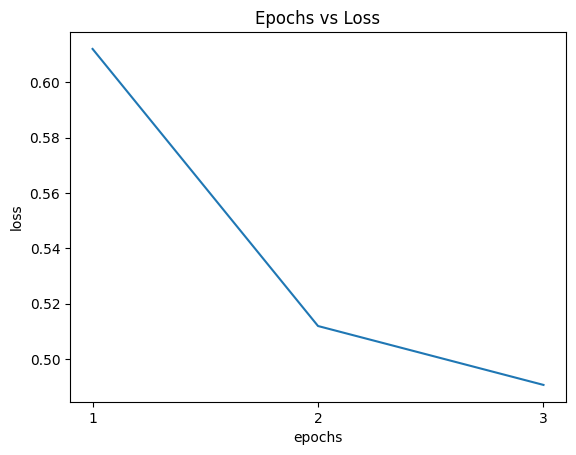

In [36]:
import matplotlib.pyplot as plt
lossItems = list()
for loss in lossPerEpoch:
    lossItems.append(loss.item())
lossItems = torch.tensor(lossItems)
epochs = torch.arange(len(lossItems))+1
print(epochs)
plt.plot(epochs,lossItems)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xticks(range(1, len(lossItems) + 1))
plt.title('Epochs vs Loss')
plt.show()